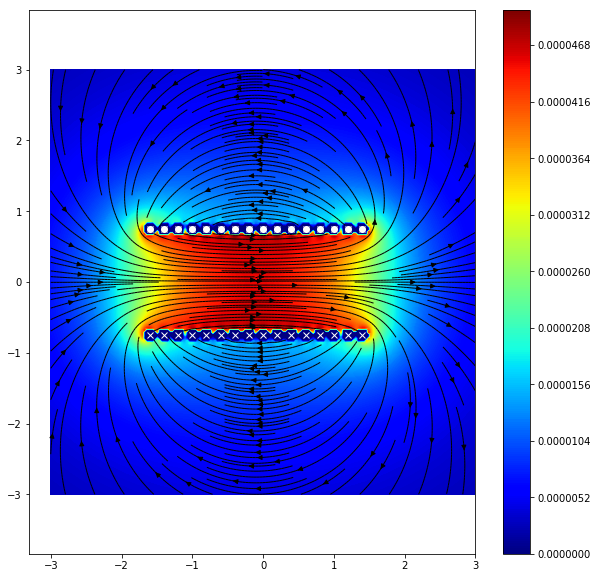

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import mu_0


#----------------------------------------------------------------------------------------
##THIS CODE WAS MADE BY MARTIN SORIA RØVANG, IF YOU USE THIS CODE PLEASE KEEP THIS LINE

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]


#Meshgrid
X, Y = np.meshgrid(np.linspace(-2,2,500), np.linspace(-2,2,500))

#Current class
class current:
    def __init__(self, i,x,y,r):
        self.i = i
        self.x = x
        self.y = y
        self.r = r

#object for two wires
currentz = [current(-10, 0, 0.75,0.1), current(10, 0, -0.75,0.1)]



fig = plt.figure()
ax = fig.add_subplot(111)

#Solving for magnetic field for wire
def B_felt(X,Y,I,x,y):
    r = np.sqrt((X-x)**2+(Y-y)**2)
    #Create magnetic magnitude array
    Bmagn = (mu_0/(2*np.pi))*(I/r)
    #Create magnetic field components
    Bx = Bmagn * -np.sin(np.arctan2(Y-y,X-x))
    By = Bmagn * np.cos(np.arctan2(Y-y,X-x))
    return Bx,By

#Superposition of all magnetic fields
def B_total(X, Y, current):
    Bx, By = 0, 0
    for C in current:
        B = B_felt(X,Y,C.i,C.x,C.y)
        Bx = Bx + B[0]
        By = By + B[1]
    #Delete magnetic field inside wire
    for C in current:
        r = np.sqrt((X-C.x)**2+(Y-C.y)**2)
        for i in range(len(r)):
            for j in range(len(r[i])):
                if r[i][j]<C.r:
                    Bx[i][j]=0
                    By[i][j]=0
    return Bx, By

#Function creating N coils
def lines(N,I,d,r0):
    N = 2*N
    count = 0
    i2 = 0
    N1 = 0
    i = 0
    sign = 1
    x = np.array([])
    y = np.array([])
    currentss = np.array([])
    while (count < N):
        x = np.append(x,-N/4*r0*2 +count*r0*2)
        y = np.append(y,-d)
        N1 += 1
        while (i2 < N1):
            x = np.append(x,-N/4*r0*2 +count*r0*2)
            y = np.append(y,d)
            i2 += 1
        count += 1
    while (i < N):
        currentss = np.append(currentss,current((-sign)*I,x[i],y[i],r0))
        sign = sign*(-1)
        i += 1
    return currentss

#Creating coil object
linecurrents = lines(16,10,0.75,0.1)
#Distributing coordiantes for coil wire positions
xline = np.array([])
yline = np.array([])
for C in linecurrents:
    xline  = np.append(xline,C.x)
    yline = np.append(yline,C.y)

#Distributing coordinates for wire positions
xpar = np.array([])
ypar = np.array([])
for C in currentz:
    xpar  = np.append(xpar,C.x)
    ypar = np.append(ypar,C.y)


#--------------------||||||||-------------------------
#Uncomment for the plot you want.


#Plotting coil
Xl, Yl = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
Bxl,Byl = B_total(Xl,Yl,linecurrents)[0],B_total(Xl,Yl,linecurrents)[1]
B = np.sqrt(B_total(Xl,Yl,linecurrents)[0]**2+B_total(Xl,Yl,linecurrents)[1]**2)
CS = plt.contourf(Xl,Yl,B,300, cmap = plt.cm.jet)
plt.colorbar(CS)  # draw colorbar
plt.streamplot(Xl,Yl,Bxl,Byl,density=[1, 5],linewidth=1,color='black')
#Plot symbols for in and out
for i in range(len(xline)):

    plt.plot(xline[i],yline[i],"x",color='white')
    if yline[i]>0:
        plt.plot(xline[i],yline[i],"o",color='white')

plt.axis('equal')
plt.show()

# #Plotting two wires
# Bx,By = B_total(X,Y,currentz)
# B2 = np.sqrt(B_total(X,Y,currentz)[0]**2+B_total(X,Y,currentz)[1]**2)
# CS = plt.contourf(X,Y,B2,300, cmap = 'jet')
# plt.colorbar(CS)  # draw colorbar
# plt.streamplot(X,Y,Bx,By,density=[1, 5],linewidth=1,color='black')
# #Plot symbols for in and out
# for i in range(len(xpar)):
#     plt.plot(xpar[i],ypar[i],"x",color='white')
#     if ypar[i]>0:
#         plt.plot(xpar[i],ypar[i],"o",color='white')
# plt.axis('equal')
# plt.show()